In [1]:
import pandas as pd

import matplotlib.pyplot as plt
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from matplotlib import pyplot
from matplotlib import style
from sklearn.preprocessing import scale
from sklearn.preprocessing import PolynomialFeatures
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import classification_report
style.use("ggplot")
import numpy as np
from scipy import stats
import seaborn as sns
#import pypyodbc as podbc
from mpl_toolkits.mplot3d import Axes3D
from pylab import *
from pandas import ExcelFile
%matplotlib inline

In [2]:
df1 = pd.read_csv('cleanseddata.csv')
df1.shape
df1.head()

,altmetric_id,mendeley,citeulike,connotea,twitter,reddit,facebook,googleplus,blogs,news,video,wikipedia,q&a,pinterest,weibo,peer_reviews,policy
0,3960260,3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0
1,2295090,13,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
2,6616300,3,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,534316,48,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
4,455135,12,0,0,4,0,0,1,0,0,0,0,0,0,0,0,0


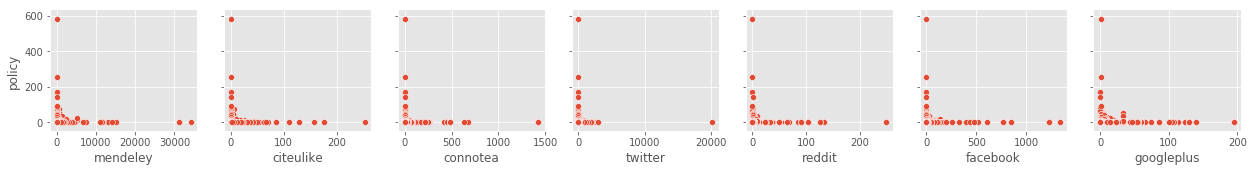

In [3]:
#sns.lmplot('reddit', 'policy', data=df1, fit_reg=False)
sns.pairplot(df1, y_vars = ['policy'],
                  x_vars = ['mendeley','citeulike','connotea','twitter','reddit','facebook','googleplus'])

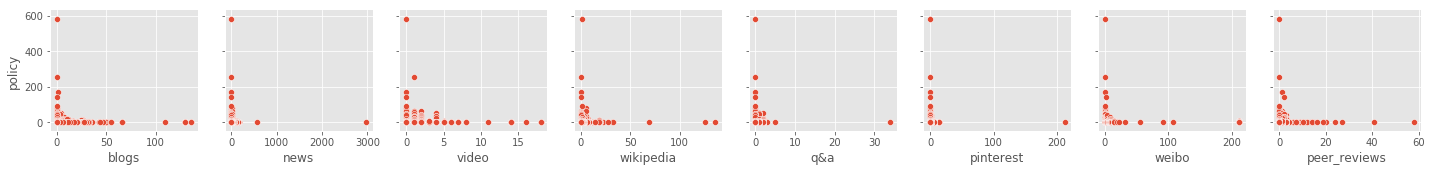

In [4]:
sns.pairplot(df1, y_vars = ['policy'],
                  x_vars = ['blogs','news','video','wikipedia','q&a','pinterest','weibo','peer_reviews'])

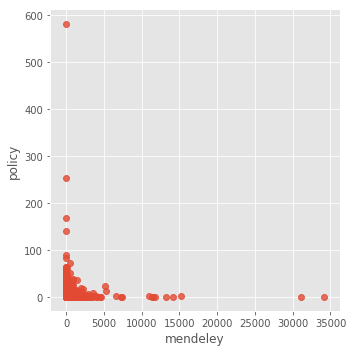

In [5]:
sns.lmplot('mendeley', 'policy', data=df1, fit_reg=False)

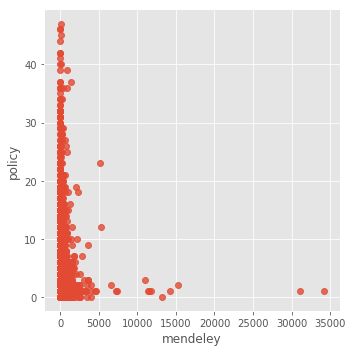

In [6]:
df2=df1[df1['policy'] < 50] 
#df3 = df2[df2['mendeley'] < 5000]
sns.lmplot('mendeley', 'policy', data=df2, fit_reg=False)

In [7]:
df1.shape

(178619, 17)

In [8]:
df2.shape

(178601, 17)

In [9]:
data = pd.read_csv('cleanseddata.csv')
data = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]

In [10]:
feature_cols = ['mendeley','citeulike','connotea','twitter','reddit','facebook','googleplus','blogs','news','video','wikipedia','q&a','pinterest','weibo','peer_reviews']
X = data[feature_cols]
Y = data.policy

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=42)

In [12]:
### Random Forrest Regression

regressor = RandomForestRegressor(n_estimators = 200, random_state = 42 )
regressor.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
           oob_score=False, random_state=42, verbose=0, warm_start=False)

In [13]:
prediction = regressor.predict(X_test)
R2 = regressor.score(X_test,y_test)
R2

0.5490862482935589

In [14]:
mse = np.mean((prediction - y_test) ** 2)
mse

0.314066823968542

NameError: name 'mydataset_y_pred' is not defined